# Peter Park Project

### Project Info

My project is about antimicrobial resistance. The data I use comes from this study, https://pmc.ncbi.nlm.nih.gov/articles/PMC9133080/, however the csv file's size was over 240 mb which VS Code did not react well with so I truncated what was about 635000 rows to a csv file, "Truncated.csv" which is comprised of the first 320 or so rows. The data covers results of MIC's, (minimum inhibitory concentrations) of certain antimicrobials and how certain species react to the antimicrobials whether they were Resistant, Susceptible, or somewhere in between.

The code below is the compilation of data analysis performed over multiple weeks of studying the data through python

### Package and Data import

In [48]:
import numpy as np
import pandas as pd
from scipy import stats as t
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('Truncated.csv')


### Data Wrangling

In [6]:
df.shape


(321, 19)

In [3]:
df.columns

Index(['Isolate Id', 'Study', 'Species', 'Organism Group', 'Country', 'State',
       'Gender', 'Age Group', 'Speciality', 'Source', 'In / Out Patient',
       'Year', 'Phenotype', 'Amikacin', 'Amikacin_I',
       'Amoxycillin clavulanate', 'Amoxycillin clavulanate_I', 'Ampicillin',
       'Ampicillin_I'],
      dtype='object')

In [4]:
df.head()

,Isolate Id,Study,Species,Organism Group,Country,State,Gender,Age Group,Speciality,Source,In / Out Patient,Year,Phenotype,Amikacin,Amikacin_I,Amoxycillin clavulanate,Amoxycillin clavulanate_I,Ampicillin,Ampicillin_I
0,1000000.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Male,85 and Over,Emergency Room,GU: Urine,None Given,2013.0,NaN,8,Susceptible,>32,NaN,>32,NaN
1,1000001.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Female,13 to 18 Years,Emergency Room,HEENT: Ears,None Given,2013.0,NaN,4,Susceptible,>32,NaN,>32,NaN
2,1000002.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Female,65 to 84 Years,Nursing Home / Rehab,GU: Urine,None Given,2013.0,NaN,4,Susceptible,>32,NaN,>32,NaN
3,1000003.0,TEST,Pseudomonas aeruginosa,Non-Enterobacteriaceae,France,NaN,Male,19 to 64 Years,Medicine General,INT: Skin,None Given,2013.0,NaN,4,Susceptible,>32,NaN,>32,NaN
4,1000004.0,TEST,Serratia marcescens,Enterobacteriaceae,France,NaN,Male,19 to 64 Years,Medicine General,CVS: Blood,None Given,2013.0,NaN,2,Susceptible,>32,Resistant,>32,Resistant


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Isolate Id                 320 non-null    float64
 1   Study                      320 non-null    object 
 2   Species                    320 non-null    object 
 3   Organism Group             320 non-null    object 
 4   Country                    320 non-null    object 
 5   State                      0 non-null      float64
 6   Gender                     317 non-null    object 
 7   Age Group                  320 non-null    object 
 8   Speciality                 320 non-null    object 
 9   Source                     320 non-null    object 
 10  In / Out Patient           320 non-null    object 
 11  Year                       320 non-null    float64
 12  Phenotype                  146 non-null    object 
 13  Amikacin                   224 non-null    object 

### Categorical Data Analysis

In [7]:
df['Species'].unique()


array(['Pseudomonas aeruginosa', 'Serratia marcescens',
       'Acinetobacter pitii', 'Acinetobacter baumannii',
       'Enterobacter cloacae', 'Escherichia coli',
       'Haemophilus influenzae', 'Staphylococcus aureus',
       'Enterococcus faecium', 'Enterococcus faecalis',
       'Streptococcus agalactiae', 'Klebsiella pneumoniae',
       'Klebsiella (Enterobacter) aerogenes', 'Acinetobacter junii',
       'Klebsiella oxytoca', 'Enterobacter kobei',
       'Streptococcus pneumoniae', 'Acinetobacter, non-speciated',
       'Acinetobacter lwoffii', 'Serratia liquefaciens',
       'Enterobacter asburiae', 'Citrobacter freundii', nan], dtype=object)

In [8]:
df.Species.value_counts()

Species
Pseudomonas aeruginosa                 36
Staphylococcus aureus                  36
Klebsiella pneumoniae                  36
Haemophilus influenzae                 29
Escherichia coli                       26
Enterococcus faecalis                  25
Enterobacter cloacae                   20
Klebsiella oxytoca                     19
Streptococcus agalactiae               17
Serratia marcescens                    16
Acinetobacter baumannii                15
Streptococcus pneumoniae               14
Klebsiella (Enterobacter) aerogenes     8
Enterobacter kobei                      5
Enterococcus faecium                    4
Acinetobacter, non-speciated            4
Acinetobacter pitii                     3
Serratia liquefaciens                   2
Enterobacter asburiae                   2
Acinetobacter junii                     1
Acinetobacter lwoffii                   1
Citrobacter freundii                    1
Name: count, dtype: int64

In [9]:
df.Species.value_counts(normalize=True) * 100

Species
Pseudomonas aeruginosa                 11.2500
Staphylococcus aureus                  11.2500
Klebsiella pneumoniae                  11.2500
Haemophilus influenzae                  9.0625
Escherichia coli                        8.1250
Enterococcus faecalis                   7.8125
Enterobacter cloacae                    6.2500
Klebsiella oxytoca                      5.9375
Streptococcus agalactiae                5.3125
Serratia marcescens                     5.0000
Acinetobacter baumannii                 4.6875
Streptococcus pneumoniae                4.3750
Klebsiella (Enterobacter) aerogenes     2.5000
Enterobacter kobei                      1.5625
Enterococcus faecium                    1.2500
Acinetobacter, non-speciated            1.2500
Acinetobacter pitii                     0.9375
Serratia liquefaciens                   0.6250
Enterobacter asburiae                   0.6250
Acinetobacter junii                     0.3125
Acinetobacter lwoffii                   0.3125
Citro

In [10]:
pd.crosstab(df['Species'], df['Amikacin_I'])

Amikacin_I,Intermediate,Resistant,Susceptible
Species,,,
Acinetobacter baumannii,1,11,3
Acinetobacter junii,0,0,1
Acinetobacter lwoffii,0,0,1
Acinetobacter pitii,0,0,3
"Acinetobacter, non-speciated",0,0,4
Citrobacter freundii,0,0,1
Enterobacter asburiae,0,0,2
Enterobacter cloacae,1,0,19
Enterobacter kobei,0,0,5


### Numerical Data Analysis

In [11]:
#Convert the values of the 'Amikacin' column to float
df['Amikacin'] = df['Amikacin'].str.replace('<', '')
df['Amikacin'] = df['Amikacin'].str.replace('>', '')
df['Amikacin'] = df['Amikacin'].str.replace('=', '')
df['Amikacin'] = df['Amikacin'].str.replace('ug/ml', '')
df['Amikacin'] = df['Amikacin'].str.replace('MIC', '')
df['Amikacin'] = df['Amikacin'].str.replace(' ', '')
df['Amikacin'] = df['Amikacin'].str.replace('µg/ml', '')


In [12]:
# Convert the 'Amikacin' column to float
df['Amikacin'] = df['Amikacin'].astype(float)

In [13]:
df.Amikacin.describe()

count    224.000000
mean       6.399554
std       14.290153
min        0.500000
25%        2.000000
50%        2.000000
75%        4.000000
max       64.000000
Name: Amikacin, dtype: float64

In [14]:
df.Amikacin.mean()

np.float64(6.399553571428571)

In [15]:
df.groupby('Amikacin_I')['Amikacin'].describe()

,count,mean,std,min,25%,50%,75%,max
Amikacin_I,,,,,,,,
Intermediate,3.0,32.000000,0.000000,32.0,32.0,32.0,32.0,32.0
Resistant,12.0,64.000000,0.000000,64.0,64.0,64.0,64.0,64.0
Susceptible,180.0,2.583333,1.833503,0.5,2.0,2.0,4.0,16.0


### Numerical + Categorical Data Analysis

In [16]:
# describe the summary statistics of the 'Amikacin' column for each 'Species' value
df.groupby('Species')['Amikacin'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Acinetobacter baumannii,15.0,49.633333,25.579335,0.5,48.000,64.00,64.000,64.0
Acinetobacter junii,1.0,2.000000,NaN,2.0,2.000,2.00,2.000,2.0
Acinetobacter lwoffii,1.0,0.500000,NaN,0.5,0.500,0.50,0.500,0.5
Acinetobacter pitii,3.0,6.666667,8.082904,2.0,2.000,2.00,9.000,16.0
"Acinetobacter, non-speciated",4.0,1.750000,0.500000,1.0,1.750,2.00,2.000,2.0
Citrobacter freundii,1.0,2.000000,NaN,2.0,2.000,2.00,2.000,2.0
Enterobacter asburiae,2.0,2.000000,0.000000,2.0,2.000,2.00,2.000,2.0
Enterobacter cloacae,20.0,3.750000,6.812334,1.0,2.000,2.00,2.000,32.0
Enterobacter kobei,5.0,2.000000,0.000000,2.0,2.000,2.00,2.000,2.0


### Numerical + Numerical Data Analysis

In [17]:
#make the 'Ampicillin' column to be float
df['Ampicillin'] = df['Ampicillin'].str.replace('<', '')
df['Ampicillin'] = df['Ampicillin'].str.replace('>', '')
df['Ampicillin'] = df['Ampicillin'].str.replace('=', '')
df['Ampicillin'] = df['Ampicillin'].str.replace('ug/ml', '')
df['Ampicillin'] = df['Ampicillin'].str.replace('MIC', '')
df['Ampicillin'] = df['Ampicillin'].str.replace(' ', '')
df['Ampicillin'] = df['Ampicillin'].str.replace('µg/ml', '')
df['Ampicillin'] = df['Ampicillin'].astype(float)

In [18]:
# Calculate the correlation between the 'Amikacin' and 'Ampicillin' columns
df['Amikacin'].corr(df['Ampicillin'])

np.float64(0.09268581755123168)

### Data Visualization

In [20]:
%config InlineBackend.figure_format = 'retina'

In [21]:
sns.set_style("whitegrid")

In [22]:
#make the Amikacin column numeric
df['Amikacin'] = pd.to_numeric(df['Amikacin'], errors='coerce')
df.Amikacin.describe()


count    224.000000
mean       6.399554
std       14.290153
min        0.500000
25%        2.000000
50%        2.000000
75%        4.000000
max       64.000000
Name: Amikacin, dtype: float64

In [23]:
#make the Amoxycillin clavunate column numeric
df['Amoxycillin clavulanate'] = pd.to_numeric(df['Amoxycillin clavulanate'], errors='coerce')
df['Amoxycillin clavulanate'].describe()

count    186.000000
mean       7.112366
std       10.469392
min        0.060000
25%        0.500000
50%        2.000000
75%        8.000000
max       32.000000
Name: Amoxycillin clavulanate, dtype: float64

In [24]:
#make the Ampicillin column numeric
df['Ampicillin'] = pd.to_numeric(df['Ampicillin'], errors='coerce')
df.Ampicillin.describe()


count    321.000000
mean      18.616324
std       14.027738
min        0.060000
25%        1.000000
50%       16.000000
75%       32.000000
max       32.000000
Name: Ampicillin, dtype: float64

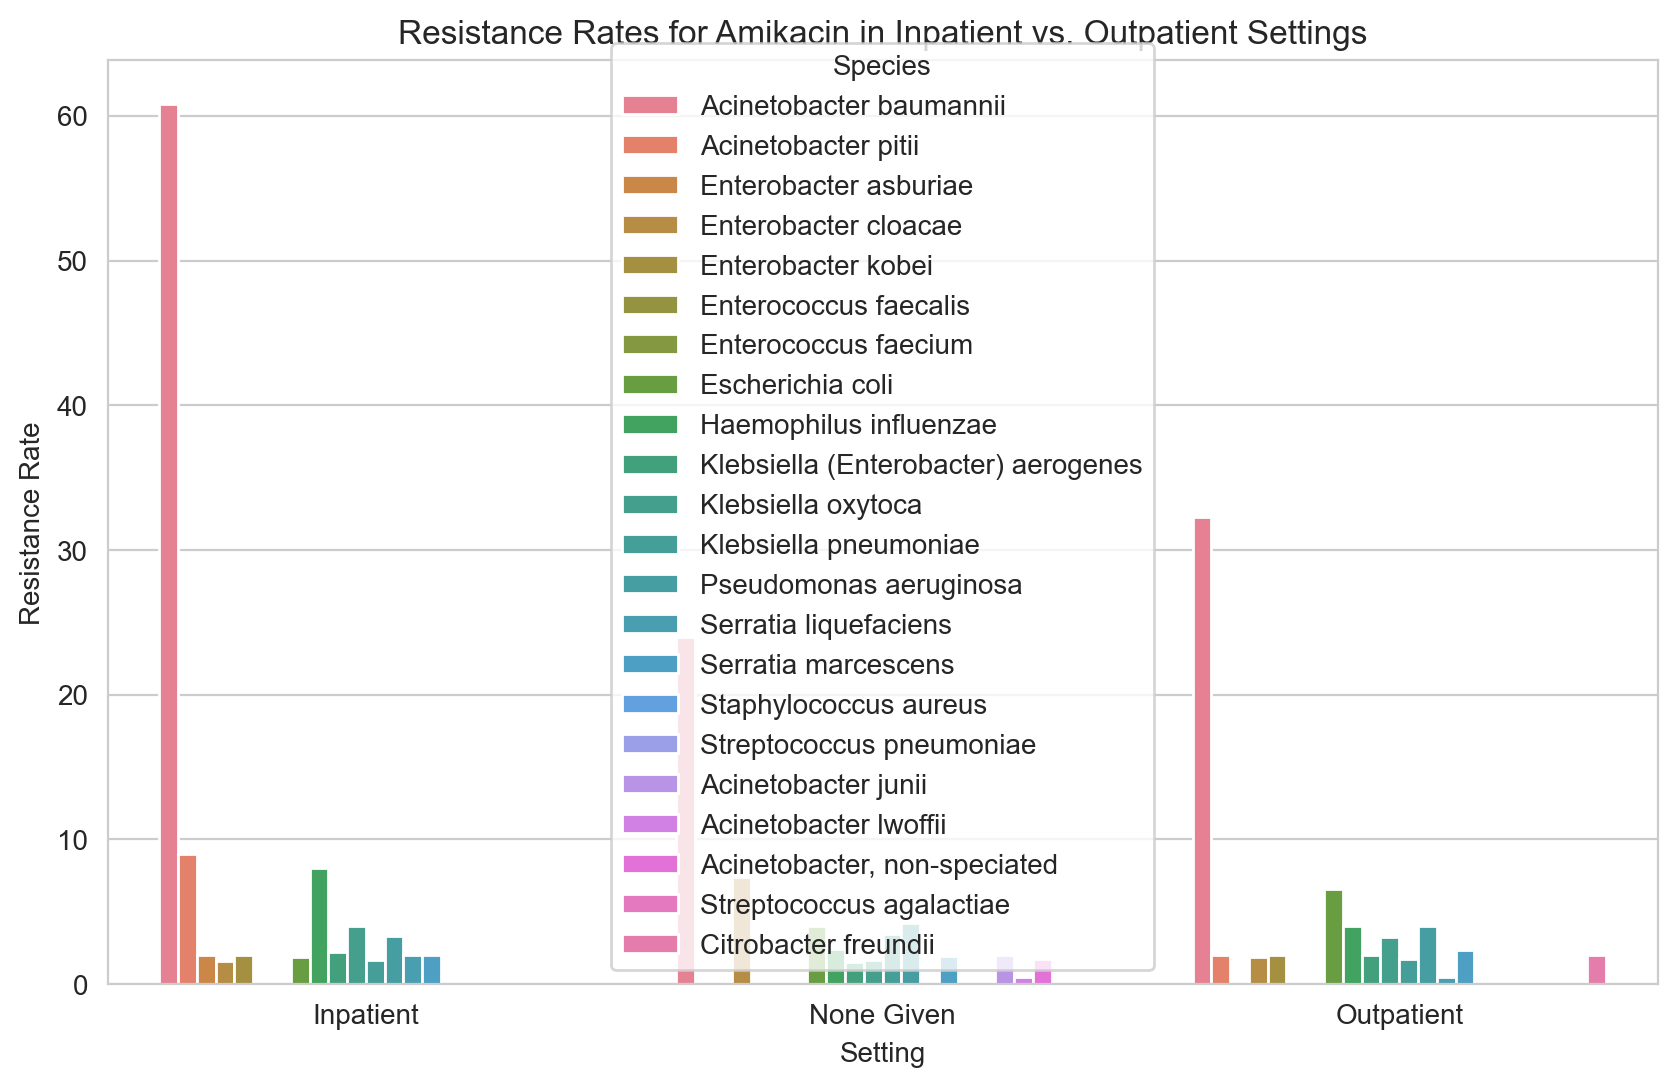

In [25]:
#create a A grouped bar chart showing the resistance rates for Amikacin in inpatient vs. outpatient settings.
df['In / Out Patient'] = df['In / Out Patient'].replace({'Inpatient': 'Inpatient', 'Outpatient': 'Outpatient'})
df['In / Out Patient'].unique()
# Create a new DataFrame with the resistance rates
resistance_rates = df.groupby(['In / Out Patient', 'Species'])['Amikacin'].mean().reset_index()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='In / Out Patient', y='Amikacin', hue='Species', data=resistance_rates)
plt.title('Resistance Rates for Amikacin in Inpatient vs. Outpatient Settings')
plt.xlabel('Setting')
plt.ylabel('Resistance Rate')
plt.legend(title='Species')
plt.show()

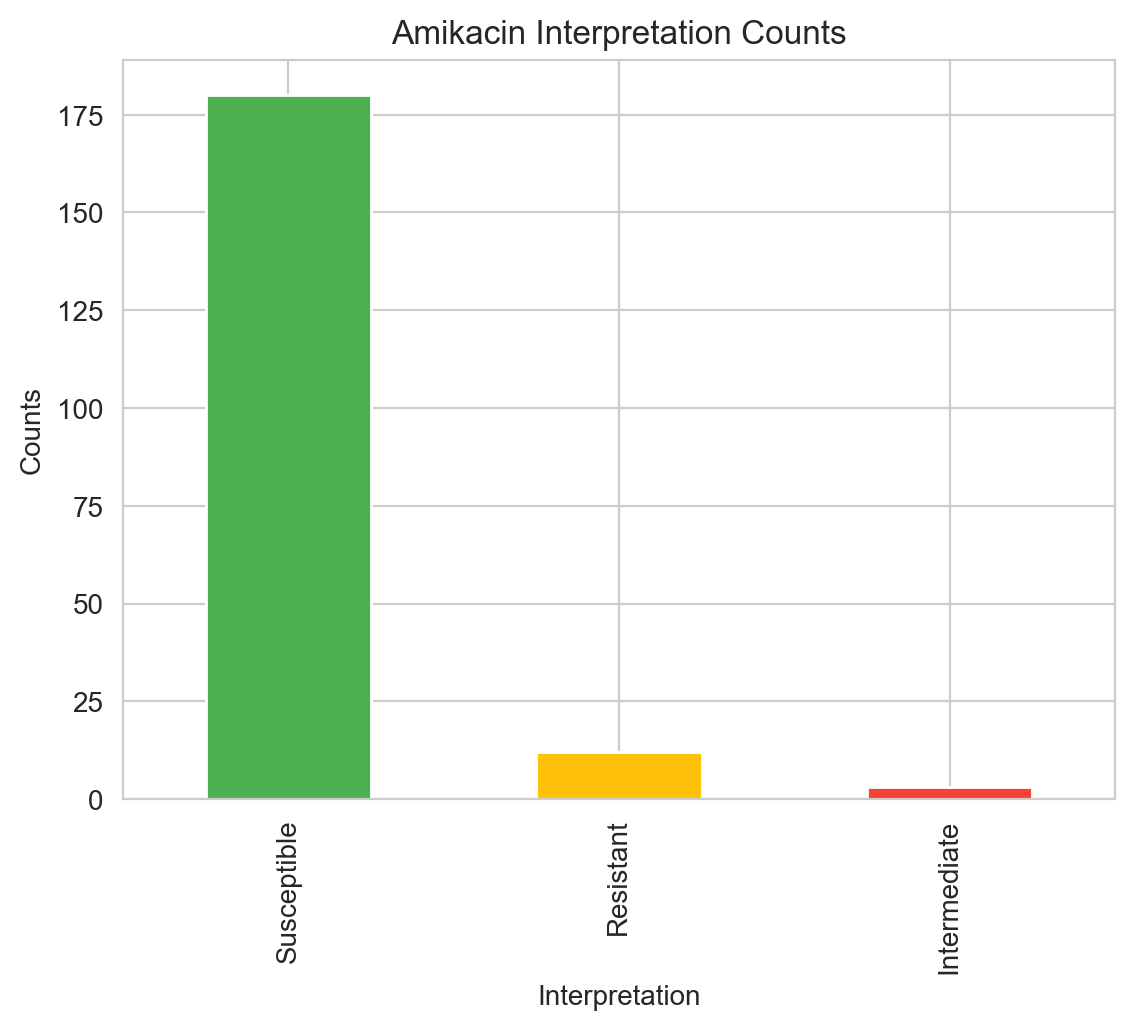

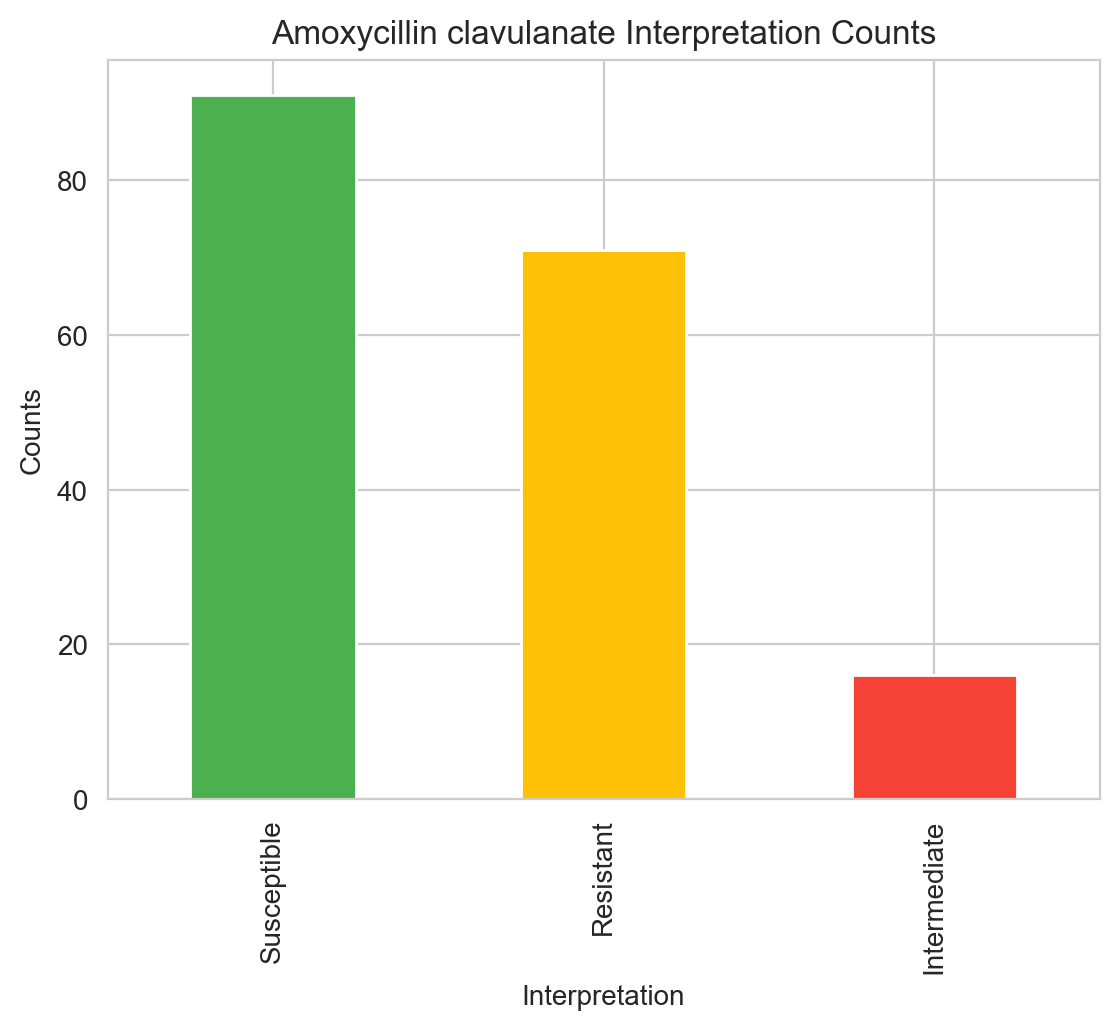

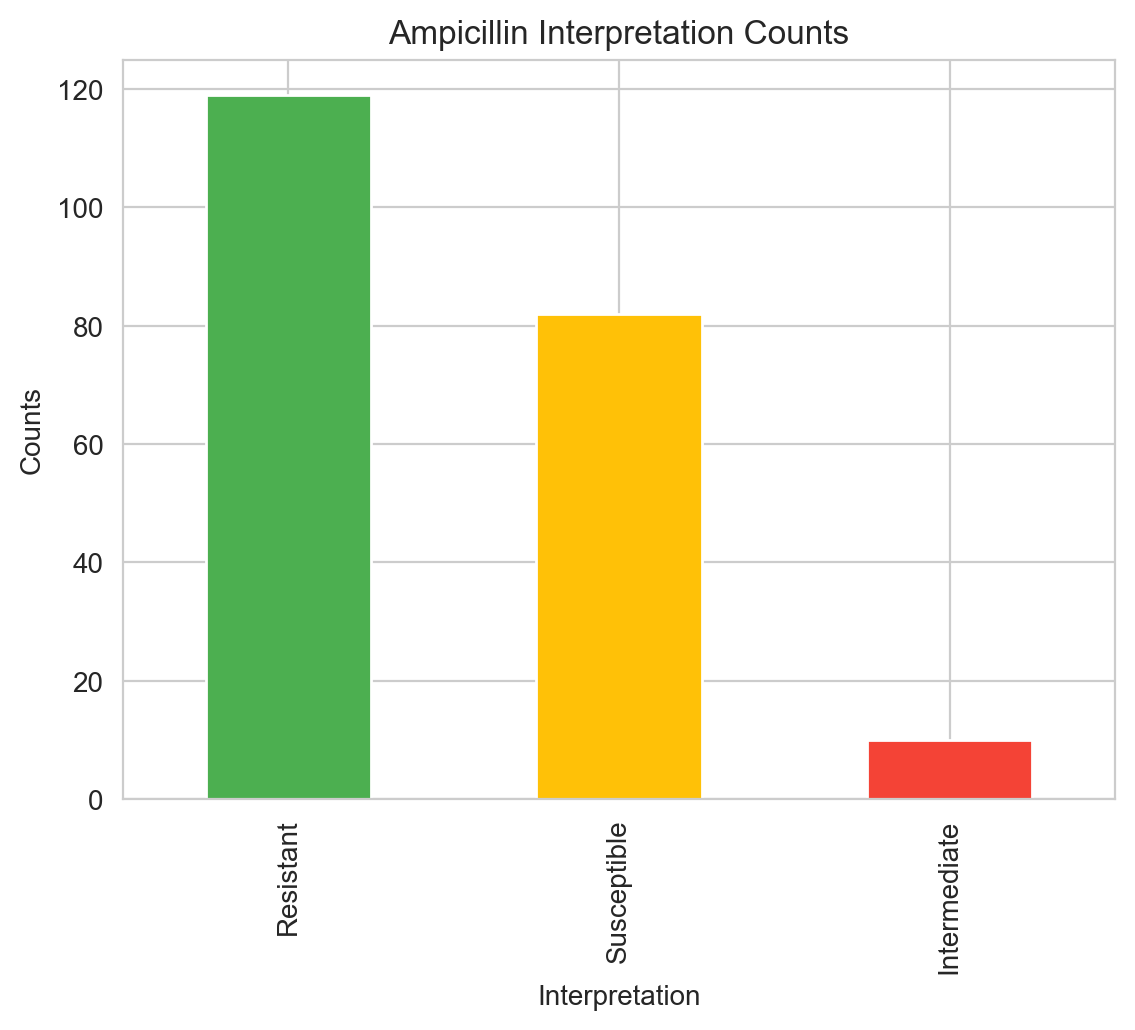

In [26]:
# make  A stacked bar chart displaying the counts of "Susceptible," "Intermediate," and "Resistant" for Amikacin
df['Amikacin_I'].value_counts()
# Create a stacked bar chart
ax = df['Amikacin_I'].value_counts().plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#F44336'])
# Set the title and labels
ax.set_title('Amikacin Interpretation Counts')
ax.set_xlabel('Interpretation')
ax.set_ylabel('Counts')
# Show the plot
plt.show()
# Create a stacked bar chart for Amoxycillin clavulanate
df['Amoxycillin clavulanate_I'].value_counts()
# Create a stacked bar chart
ax = df['Amoxycillin clavulanate_I'].value_counts().plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#F44336'])
# Set the title and labels
ax.set_title('Amoxycillin clavulanate Interpretation Counts')
ax.set_xlabel('Interpretation')
ax.set_ylabel('Counts')
# Show the plot
plt.show()
# Create a stacked bar chart for Ampicillin
df['Ampicillin_I'].value_counts()
# Create a stacked bar chart          
ax = df['Ampicillin_I'].value_counts().plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107', '#F44336'])
# Set the title and labels
ax.set_title('Ampicillin Interpretation Counts')
ax.set_xlabel('Interpretation')
ax.set_ylabel('Counts')
# Show the plot
plt.show()

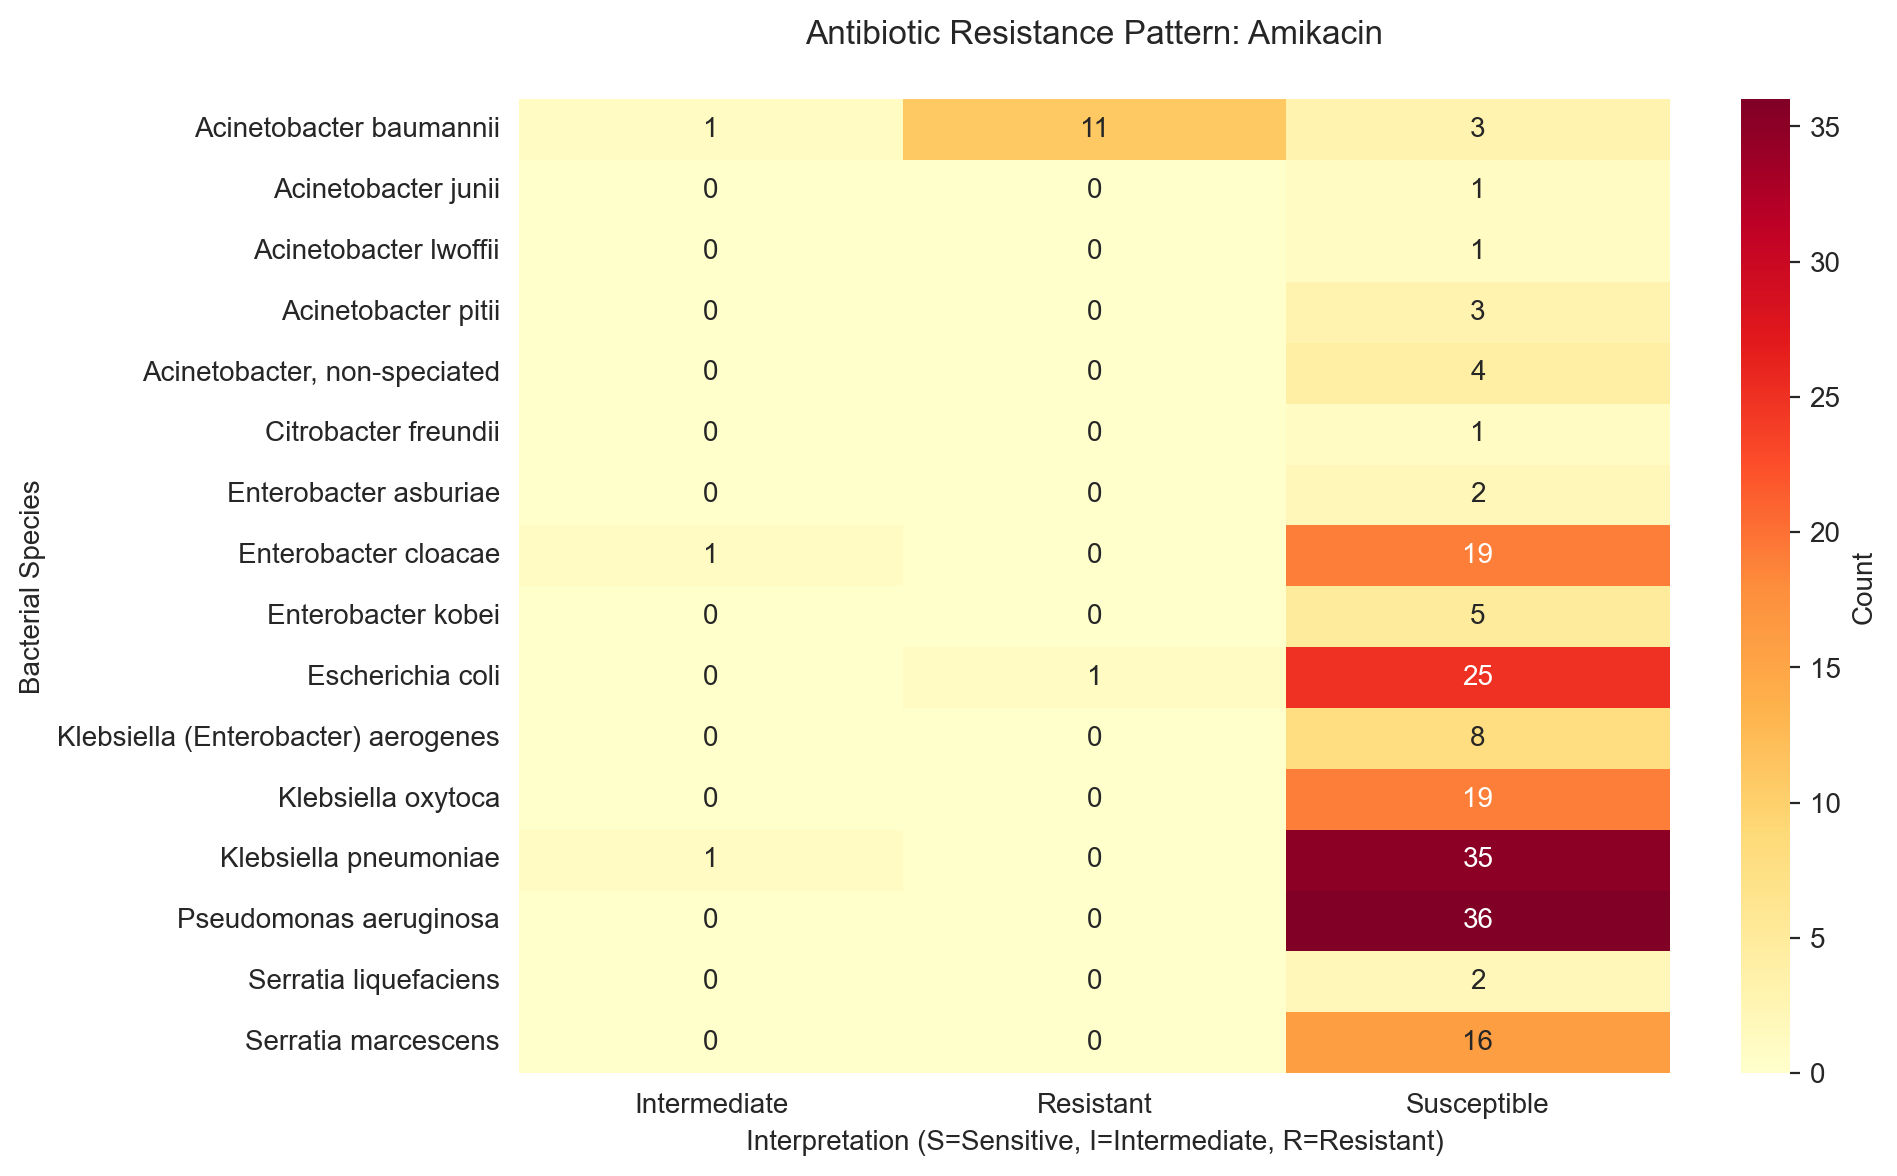

In [29]:
# Create a cross-tabulation instead of pivot table
heatmap_data = pd.crosstab(df['Species'], df['Amikacin_I'])

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap with improved formatting
sns.heatmap(
    data=heatmap_data,
    cmap='YlOrRd',  # Color map more suitable for resistance data
    annot=True,     # Show numbers in cells
    fmt='d',        # Format as integers
    cbar_kws={'label': 'Count'}  # Add colorbar label
)

# Customize the plot
plt.title('Antibiotic Resistance Pattern: Amikacin', pad=20)
plt.xlabel('Interpretation (S=Sensitive, I=Intermediate, R=Resistant)')
plt.ylabel('Bacterial Species')

# Rotate labels for better readability
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

### Data Distributions

In [31]:
# Set random seed for reproducibility
np.random.seed(12)

In [40]:
# Convert Amikacin column to numeric, handling non-numeric values
df['Amikacin_numeric'] = pd.to_numeric(df['Amikacin'], errors='coerce')

# Drop rows with missing Amikacin values
amikacin_values = df['Amikacin_numeric'].dropna().values

In [43]:
sample = np.random.choice(amikacin_values, size=40, replace=False)

In [44]:
sample_mean=sample.mean()
sample_mean

np.float64(6.525)

In [45]:
sample_std=sample.std(ddof=1)
sample_std

np.float64(12.258931856259348)

In [46]:
standard_error=sample_std/np.sqrt(len(sample))
standard_error

np.float64(1.9383073173287708)

In [54]:
c = stats.t.ppf(0.975, df=39)
c

np.float64(2.0226909200367604)

In [56]:
lower_bound = sample_mean - c * standard_error
lower_bound

np.float64(2.604403388998284)

In [57]:
upper_bound = sample_mean + c * standard_error
upper_bound

np.float64(10.445596611001717)

In [58]:
bootstrapped_means = []
for _ in range(1000):
    bootstrap_sample = np.random.choice(sample, size=40, replace=True)
    bootstrapped_means.append(bootstrap_sample.mean())
bootstrapped_means = np.sort(bootstrapped_means)

In [60]:
percentile_2_5 = bootstrapped_means[int(0.025 * 1000)]
percentile_2_5

np.float64(3.3125)

In [61]:
percentile_97_5 = bootstrapped_means[int(0.975 * 1000)]
percentile_97_5

np.float64(10.875)